In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('ticks')
palette = sns.color_palette("RdBu_r", n_colors=25)

from depynd.information import mutual_information, conditional_mutual_information

In [2]:
cov = [[1, 0.5], [0.5, 1]]
x, y = tuple(np.random.multivariate_normal(np.zeros(2), cov, 2000).T)
mi_true = -0.5 * np.log(1 - 0.5 ** 2)
mi_pred_1 = mutual_information(x, y, mi_estimator='knn')
mi_pred_2 = mutual_information(x, y, mi_estimator='dr')
mi_true, mi_pred_1, mi_pred_2

(0.14384103622589045, 0.14914500290181465, 0.138329712141372)

In [3]:
iris = sklearn.datasets.load_iris()
df = pd.DataFrame(iris.data, columns=list(iris.feature_names))
df['target'] = iris.target
X = df.values

In [4]:
def mimat(X):
    n, d = X.shape
    mis = np.zeros([d, d])
    for i, j in [(i, j) for i in range(d) for j in range(i + 1, d)]:
        x = X[:, i]
        y = X[:, j]
        mis[i, j] = mis[j, i] = mutual_information(x, y, force_non_negative=True)
    return mis

def cmimat(X):
    n, d = X.shape
    cmis = np.zeros([d, d])
    for i, j in [(i, j) for i in range(d) for j in range(i + 1, d)]:
        x = X[:, i]
        y = X[:, j]
        z = X[:, (np.arange(d) != i) & (np.arange(d) != j)]
        cmis[i, j] = cmis[j, i] = conditional_mutual_information(x, y, z, force_non_negative=True)
    return cmis

In [5]:
mis = mimat(X)
cmis = cmimat(X)

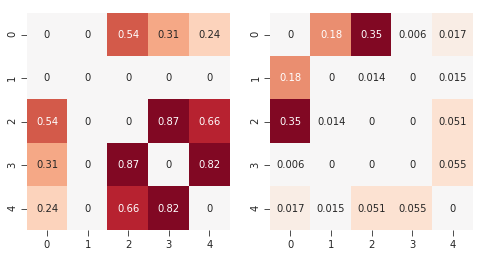

In [6]:
f, axes = plt.subplots(1, 2, figsize=[8, 4])
sns.heatmap(mis, annot=True, center=0, cmap=palette, cbar=False, ax=axes[0])
sns.heatmap(cmis, annot=True, center=0, cmap=palette, cbar=False, ax=axes[1])

In [7]:
boston = sklearn.datasets.load_boston()
df = pd.DataFrame(boston.data, columns=list(boston.feature_names))
df['target'] = boston.target
X = df.values

In [8]:
mis = mimat(X)
cmis = cmimat(X)

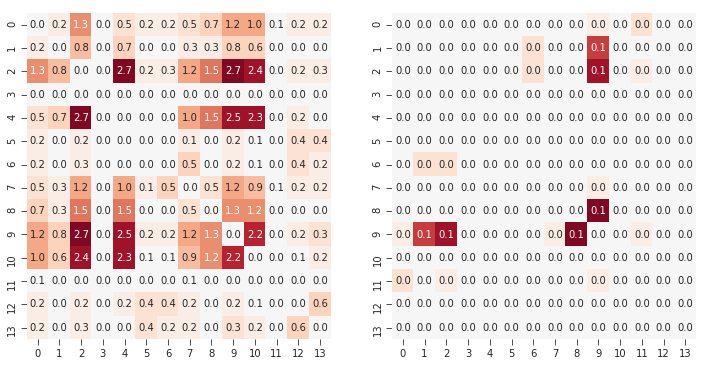

In [9]:
f, axes = plt.subplots(1, 2, figsize=[12, 6])
sns.heatmap(mis, annot=True, center=0, cmap=palette, cbar=False, ax=axes[0], fmt='.1f')
sns.heatmap(cmis, annot=True, center=0, cmap=palette, cbar=False, ax=axes[1], fmt='.1f')